<a href="https://colab.research.google.com/github/Thilagavijayan/ML_SupervisedLearning/blob/main/House_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
house_data = pd.read_csv('/content/kc_house_data.csv')

In [3]:
house_data.shape
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 10

fig_size[1] = 8

plt.rcParams["figure.figsize"] = fig_size

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


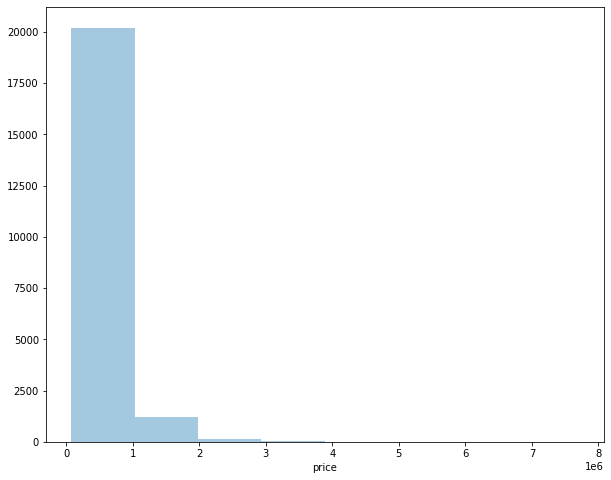

In [7]:
sns.distplot(house_data['price'], kde=False, bins=8)

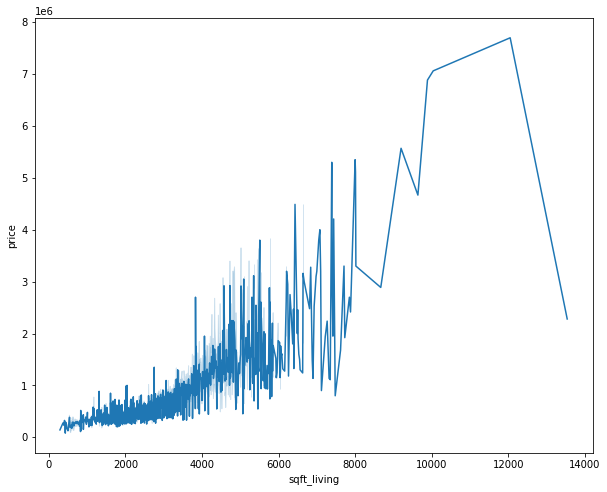

In [9]:
sns.lineplot(x="sqft_living", y="price", data=house_data)

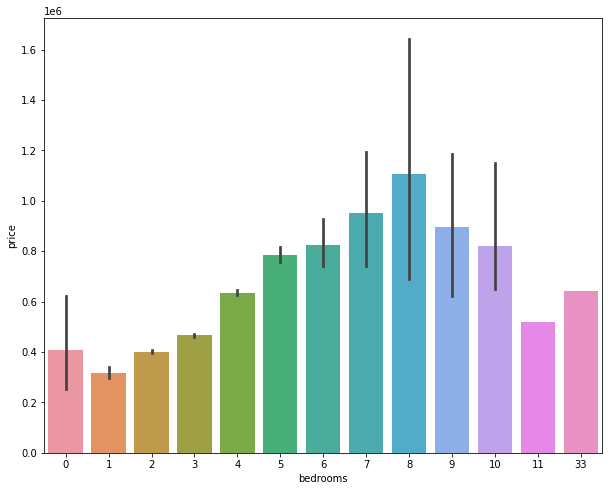

In [10]:
sns.barplot(x='bedrooms', y='price', data=house_data)

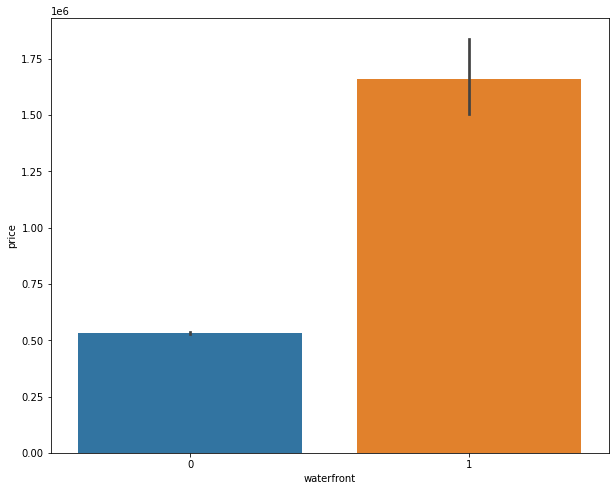

In [12]:
sns.barplot(x='waterfront', y='price', data=house_data)

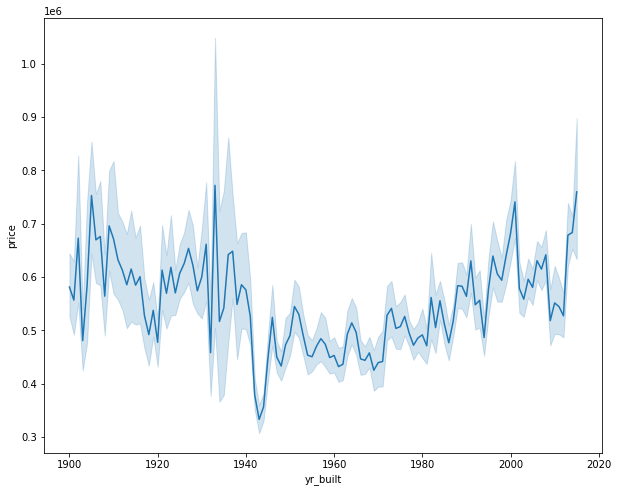

In [13]:
sns.lineplot(x='yr_built', y='price', data=house_data)

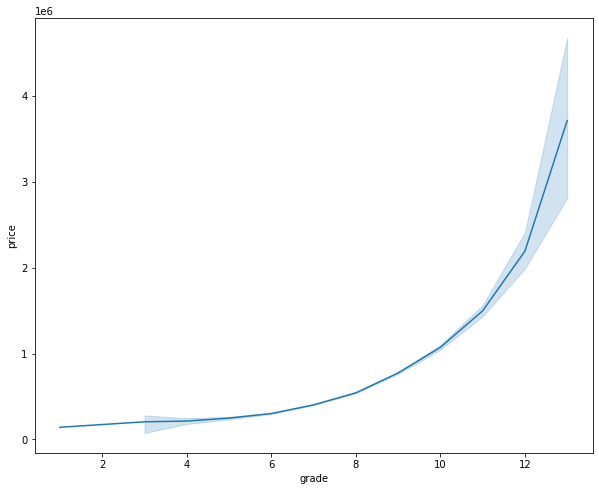

In [14]:
sns.lineplot(x='grade', y='price', data=house_data)

In [15]:
dataset_features = house_data.drop(['price', 'id', 'date'], axis=1)

dataset_labels = house_data['price']

In [17]:
from sklearn.model_selection import train_test_split

train_features,test_features,train_labels,test_labels = train_test_split(dataset_features,dataset_labels,test_size=0.2, random_state=21)



In [18]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(train_features, train_labels)

LinearRegression()

In [19]:
predicted_price = regressor.predict(test_features)

In [20]:
from sklearn import metrics

In [25]:
print('Mean sAbsolute Error:', metrics.mean_absolute_error( test_labels, predicted_price)) 
print('Mean Squared Error:', metrics.mean_squared_error(test_labels,predicted_price)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predicted_price)))

Mean sAbsolute Error: 70467.01934555387
Mean Squared Error: 16251802750.754648
Root Mean Squared Error: 127482.55861393215


In [22]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)

regressor.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=200, random_state=0)

In [23]:
predicted_price = regressor.predict(test_features)

In [24]:
from sklearn import metrics

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error( test_labels, predicted_price)) 
print('Mean Squared Error:', metrics.mean_squared_error(test_labels,predicted_price)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predicted_price)))

Mean Absolute Error: 70467.01934555387
Mean Squared Error: 16251802750.754648
Root Mean Squared Error: 127482.55861393215
